In [3]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import scipy.stats as stats
from matplotlib import rcParams
from scipy.stats import chi2_contingency
from sklearn.preprocessing import MinMaxScaler, StandardScaler
from sklearn.feature_selection import SelectFromModel
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from imblearn.under_sampling import RandomUnderSampler
from imblearn.over_sampling import RandomOverSampler, SMOTE
from sklearn.feature_selection import SelectKBest, f_classif, chi2, VarianceThreshold
from sklearn.ensemble import RandomForestClassifier
from sklearn.feature_selection import mutual_info_classif
from sklearn.decomposition import PCA

In [4]:
data = pd.read_csv(r"/content/Training Data.csv")

In [5]:
data.head(10)

,Id,Income,Age,Experience,Married/Single,House_Ownership,Car_Ownership,Profession,CITY,STATE,CURRENT_JOB_YRS,CURRENT_HOUSE_YRS,Risk_Flag
0,1,1303834,23,3,single,rented,no,Mechanical_engineer,Rewa,Madhya_Pradesh,3,13,0
1,2,7574516,40,10,single,rented,no,Software_Developer,Parbhani,Maharashtra,9,13,0
2,3,3991815,66,4,married,rented,no,Technical_writer,Alappuzha,Kerala,4,10,0
3,4,6256451,41,2,single,rented,yes,Software_Developer,Bhubaneswar,Odisha,2,12,1
4,5,5768871,47,11,single,rented,no,Civil_servant,Tiruchirappalli[10],Tamil_Nadu,3,14,1
5,6,6915937,64,0,single,rented,no,Civil_servant,Jalgaon,Maharashtra,0,12,0
6,7,3954973,58,14,married,rented,no,Librarian,Tiruppur,Tamil_Nadu,8,12,0
7,8,1706172,33,2,single,rented,no,Economist,Jamnagar,Gujarat,2,14,0
8,9,7566849,24,17,single,rented,yes,Flight_attendant,Kota[6],Rajasthan,11,11,0
9,10,8964846,23,12,single,rented,no,Architect,Karimnagar,Telangana,5,13,0


### 1. Data Cleansing

#### A. Handle missing values


In [6]:
data['Id'] = data['Id'].astype(str)
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 252000 entries, 0 to 251999
Data columns (total 13 columns):
 #   Column             Non-Null Count   Dtype 
---  ------             --------------   ----- 
 0   Id                 252000 non-null  object
 1   Income             252000 non-null  int64 
 2   Age                252000 non-null  int64 
 3   Experience         252000 non-null  int64 
 4   Married/Single     252000 non-null  object
 5   House_Ownership    252000 non-null  object
 6   Car_Ownership      252000 non-null  object
 7   Profession         252000 non-null  object
 8   CITY               252000 non-null  object
 9   STATE              252000 non-null  object
 10  CURRENT_JOB_YRS    252000 non-null  int64 
 11  CURRENT_HOUSE_YRS  252000 non-null  int64 
 12  Risk_Flag          252000 non-null  int64 
dtypes: int64(6), object(7)
memory usage: 25.0+ MB


#### B. Handle Duplicated Data


In [7]:
data.duplicated().sum()

0

In [8]:
data.isna().sum()

Id                   0
Income               0
Age                  0
Experience           0
Married/Single       0
House_Ownership      0
Car_Ownership        0
Profession           0
CITY                 0
STATE                0
CURRENT_JOB_YRS      0
CURRENT_HOUSE_YRS    0
Risk_Flag            0
dtype: int64

#### C. Handle outliers


In [9]:
# Melalukan subset pada data numerik
num_dtypes = ['int16','int32','int64','float16','float32','float64']

# Subset dataloan
num_dataloan = data.select_dtypes(include=num_dtypes)
numericals=[col for col in num_dataloan.columns if col not in ['Id', 'Risk_Flag']]
print(numericals)

['Income', 'Age', 'Experience', 'CURRENT_JOB_YRS', 'CURRENT_HOUSE_YRS']


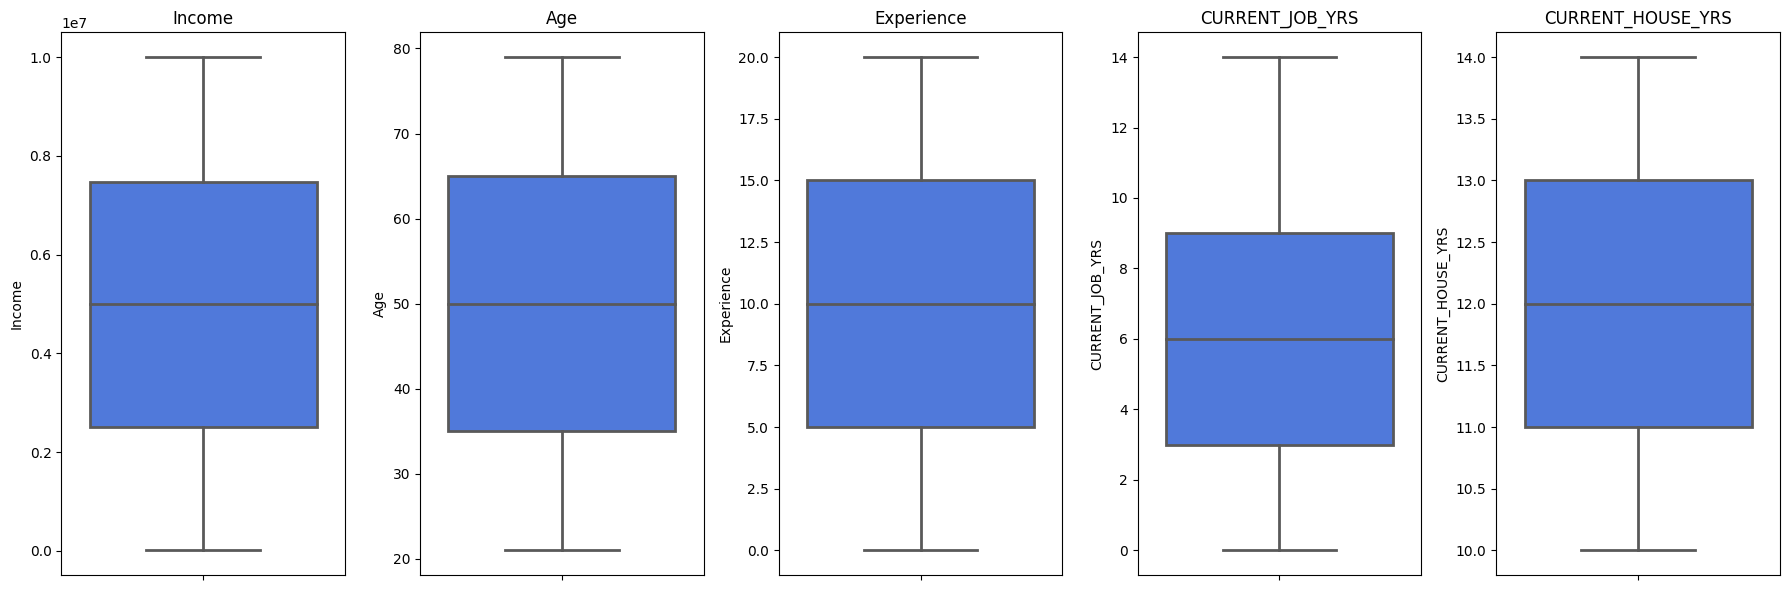

In [10]:
# Menggunakan len(numerical) untuk mendapatkan jumlah fitur numerik
palette=['#3970F1', '#D63434']
plt.figure(figsize=(18, 6))
# Loop melalui fitur numerik dan membuat subplot untuk setiap fitur
for i in range(len(numericals)):
    plt.subplot(1, len(numericals), i + 1)
    sns.boxplot(y=data[numericals[i]], palette=palette, orient='y', linewidth=2)
    plt.title(numericals[i])
    plt.tight_layout()

plt.show()

In [11]:
z_score = np.abs(stats.zscore(data['Age']))
filter_entri = (z_score < 3)
data = data[filter_entri]

In [12]:
data.head(10)

,Id,Income,Age,Experience,Married/Single,House_Ownership,Car_Ownership,Profession,CITY,STATE,CURRENT_JOB_YRS,CURRENT_HOUSE_YRS,Risk_Flag
0,1,1303834,23,3,single,rented,no,Mechanical_engineer,Rewa,Madhya_Pradesh,3,13,0
1,2,7574516,40,10,single,rented,no,Software_Developer,Parbhani,Maharashtra,9,13,0
2,3,3991815,66,4,married,rented,no,Technical_writer,Alappuzha,Kerala,4,10,0
3,4,6256451,41,2,single,rented,yes,Software_Developer,Bhubaneswar,Odisha,2,12,1
4,5,5768871,47,11,single,rented,no,Civil_servant,Tiruchirappalli[10],Tamil_Nadu,3,14,1
5,6,6915937,64,0,single,rented,no,Civil_servant,Jalgaon,Maharashtra,0,12,0
6,7,3954973,58,14,married,rented,no,Librarian,Tiruppur,Tamil_Nadu,8,12,0
7,8,1706172,33,2,single,rented,no,Economist,Jamnagar,Gujarat,2,14,0
8,9,7566849,24,17,single,rented,yes,Flight_attendant,Kota[6],Rajasthan,11,11,0
9,10,8964846,23,12,single,rented,no,Architect,Karimnagar,Telangana,5,13,0


#### D. Feature transformation

In [13]:
min_max_scaler = MinMaxScaler()
standard_scaler = StandardScaler()

income_data = data['Income'].values.reshape(-1, 1)

data['Income_norm'] = min_max_scaler.fit_transform(income_data)
data['Income_std'] = standard_scaler.fit_transform(income_data)

In [14]:
data[['Income','Income_norm', 'Income_std']].describe()

,Income,Income_norm,Income_std
count,2.520000e+05,252000.000000,2.520000e+05
mean,4.997117e+06,0.499198,4.436663e-17
std,2.878311e+06,0.288130,1.000002e+00
min,1.031000e+04,0.000000,-1.732550e+00
25%,2.503015e+06,0.249529,-8.665174e-01
50%,5.000694e+06,0.499557,1.243035e-03
75%,7.477502e+06,0.747495,8.617520e-01
max,9.999938e+06,1.000000,1.738114e+00


#### E. Feature encoding

Kolom :
- Merried/Single
- Car_Ownership
- House_Ownership
- Profession
- CITY
- STATE

**LABEL ENCODING:**

- Merried/Single
- Car_Ownership

sebelum diubah ke int

In [15]:
kolom_encoder = ['Married/Single', 'Car_Ownership']

for kolom in kolom_encoder:
    print(data[kolom].value_counts())
    print('---'*10, '\n')

single     226272
married     25728
Name: Married/Single, dtype: int64
------------------------------ 

no     176000
yes     76000
Name: Car_Ownership, dtype: int64
------------------------------ 



Sesudah diubah ke int

In [16]:
label_encoder = LabelEncoder()

data['Married/Single'] = label_encoder.fit_transform(data['Married/Single'])
data['Car_Ownership'] = label_encoder.fit_transform(data['Car_Ownership'])

In [17]:
kolom_encoder = ['Married/Single', 'Car_Ownership']

for col in kolom_encoder:
    print(data[col].value_counts())
    print('---'*10, '\n')

1    226272
0     25728
Name: Married/Single, dtype: int64
------------------------------ 

0    176000
1     76000
Name: Car_Ownership, dtype: int64
------------------------------ 



**Keterangan:**

- Married/Single  : Single=1, Married=0
- Car_Ownership   : no=0, yes=1

**ONE-HOT-ENCODING:**

- Profession
- STATE
- CITY
- House Ownership

In [18]:
kolom_one_hot_encoder = ['Profession', 'STATE', 'CITY', 'House_Ownership']

for col in kolom_one_hot_encoder:
    print(col)
    print(data[col].nunique())
    print('---'*10, '\n')

Profession
51
------------------------------ 

STATE
29
------------------------------ 

CITY
317
------------------------------ 

House_Ownership
3
------------------------------ 



Karena kolom 'CITY' memiliki unik yang sangat banyak, sehingga diputuskan untuk drop kolom.

In [19]:
data = data.drop(columns=['CITY'],axis=1)

In [20]:
unique_professions = data['Profession'].unique()
unique_professions

array(['Mechanical_engineer', 'Software_Developer', 'Technical_writer',
       'Civil_servant', 'Librarian', 'Economist', 'Flight_attendant',
       'Architect', 'Designer', 'Physician', 'Financial_Analyst',
       'Air_traffic_controller', 'Politician', 'Police_officer', 'Artist',
       'Surveyor', 'Design_Engineer', 'Chemical_engineer',
       'Hotel_Manager', 'Dentist', 'Comedian', 'Biomedical_Engineer',
       'Graphic_Designer', 'Computer_hardware_engineer',
       'Petroleum_Engineer', 'Secretary', 'Computer_operator',
       'Chartered_Accountant', 'Technician', 'Microbiologist',
       'Fashion_Designer', 'Aviator', 'Psychologist', 'Magistrate',
       'Lawyer', 'Firefighter', 'Engineer', 'Official', 'Analyst',
       'Geologist', 'Drafter', 'Statistician', 'Web_designer',
       'Consultant', 'Chef', 'Army_officer', 'Surgeon', 'Scientist',
       'Civil_engineer', 'Industrial_Engineer', 'Technology_specialist'],
      dtype=object)

In [21]:
Profesi_groups = {
    'tech_engineering'  : ['Industrial_Engineer', 'Air_traffic_controller', 'Architect', 'Aviator', 'Biomedical_Engineer', 'Chemical_engineer', 'Civil_engineer', 'Computer_hardware_engineer', 'Computer_operator', 'Design_Engineer', 'Engineer', 'Mechanical_engineer', 'Petroleum_Engineer', 'Software_Developer', 'Technology_specialist', 'Web_designer', 'Drafter', 'Technician', 'Surveyor', 'Technical_writer'],
    'business'          : ['Analyst', 'Chartered_Accountant', 'Economist', 'Financial_Analyst', 'Hotel_Manager','Chef'],
    'artist'            : ['Artist', 'Comedian', 'Fashion_Designer', 'Graphic_Designer', 'Designer','Dentist', 'Surgeon'],
    'social_scientist'  : ['Physician', 'Geologist', 'Microbiologist', 'Scientist', 'Statistician','Librarian', 'Magistrate'],
    'service'           : ['Consultant', 'Secretary', 'Psychologist', 'Civil_servant', 'Firefighter', 'Flight_attendant', 'Official', 'Politician','Army_officer', 'Lawyer', 'Police_officer']
}

# Buat kolom baru 'Profession Group' dan inisialisasi dengan nilai 'Other Professions'
data['Profession Group'] = 'Other Professions'

# Iterasi melalui dictionary Profesi_groups dan ubah nilai 'Profession Group' sesuai kriteria
for group, professions in Profesi_groups.items():
    data.loc[data['Profession'].isin(professions), 'Profession Group'] = group

# Lakukan one-hot encoding pada kolom 'Profession Group'
data_encoded_profesi = pd.get_dummies(data, columns=['Profession Group'], prefix=['Profession Group'])

In [22]:
data_encoded_profesi.head(10)

,Id,Income,Age,Experience,Married/Single,House_Ownership,Car_Ownership,Profession,STATE,CURRENT_JOB_YRS,CURRENT_HOUSE_YRS,Risk_Flag,Income_norm,Income_std,Profession Group_artist,Profession Group_business,Profession Group_service,Profession Group_social_scientist,Profession Group_tech_engineering
0,1,1303834,23,3,1,rented,0,Mechanical_engineer,Madhya_Pradesh,3,13,0,0.129487,-1.283145,0,0,0,0,1
1,2,7574516,40,10,1,rented,0,Software_Developer,Maharashtra,9,13,0,0.757206,0.895457,0,0,0,0,1
2,3,3991815,66,4,0,rented,0,Technical_writer,Kerala,4,10,0,0.398564,-0.349269,0,0,0,0,1
3,4,6256451,41,2,1,rented,1,Software_Developer,Odisha,2,12,1,0.625263,0.437526,0,0,0,0,1
4,5,5768871,47,11,1,rented,0,Civil_servant,Tamil_Nadu,3,14,1,0.576454,0.268128,0,0,1,0,0
5,6,6915937,64,0,1,rented,0,Civil_servant,Maharashtra,0,12,0,0.691280,0.666649,0,0,1,0,0
6,7,3954973,58,14,0,rented,0,Librarian,Tamil_Nadu,8,12,0,0.394876,-0.362068,0,0,0,1,0
7,8,1706172,33,2,1,rented,0,Economist,Gujarat,2,14,0,0.169762,-1.143362,0,1,0,0,0
8,9,7566849,24,17,1,rented,1,Flight_attendant,Rajasthan,11,11,0,0.756438,0.892794,0,0,1,0,0
9,10,8964846,23,12,1,rented,0,Architect,Telangana,5,13,0,0.896383,1.378495,0,0,0,0,1


In [23]:
unique_state = data['STATE'].unique()
unique_state

array(['Madhya_Pradesh', 'Maharashtra', 'Kerala', 'Odisha', 'Tamil_Nadu',
       'Gujarat', 'Rajasthan', 'Telangana', 'Bihar', 'Andhra_Pradesh',
       'West_Bengal', 'Haryana', 'Puducherry', 'Karnataka',
       'Uttar_Pradesh', 'Himachal_Pradesh', 'Punjab', 'Tripura',
       'Uttarakhand', 'Jharkhand', 'Mizoram', 'Assam',
       'Jammu_and_Kashmir', 'Delhi', 'Chhattisgarh', 'Chandigarh',
       'Uttar_Pradesh[5]', 'Manipur', 'Sikkim'], dtype=object)

In [24]:
State_groups = {
    'North'    : ['Chandigarh', 'Delhi', 'Haryana', 'Himachal_Pradesh', 'Jammu_and_Kashmir', 'Punjab', 'Uttar_Pradesh', 'Uttar_Pradesh[5]', 'Uttarakhand'],
    'South'    : ['Andhra_Pradesh', 'Karnataka', 'Kerala', 'Tamil_Nadu', 'Telangana', 'Puducherry'],
    'West'     : ['Gujarat', 'Maharashtra', 'Rajasthan'],
    'East'     : ['Assam', 'Bihar', 'Jharkhand', 'Odisha', 'Sikkim', 'West_Bengal'],
    'Center'   : ['Chhattisgarh', 'Madhya_Pradesh'],
    'Northeast': ['Manipur', 'Mizoram', 'Tripura']
}

# Buat kolom baru 'Region' dan inisialisasi dengan nilai 'Other'
data['Region'] = 'Other'

# Iterasi melalui dictionary State_groups dan ubah nilai 'Region' sesuai kriteria
for region, states in State_groups.items():
    data.loc[data['STATE'].isin(states), 'Region'] = region

# Lakukan one-hot encoding pada kolom 'Region'
data_encoded_state = pd.get_dummies(data, columns=['Region'], prefix=['Region'])

In [25]:
data_encoded_state.head(10)

,Id,Income,Age,Experience,Married/Single,House_Ownership,Car_Ownership,Profession,STATE,CURRENT_JOB_YRS,...,Risk_Flag,Income_norm,Income_std,Profession Group,Region_Center,Region_East,Region_North,Region_Northeast,Region_South,Region_West
0,1,1303834,23,3,1,rented,0,Mechanical_engineer,Madhya_Pradesh,3,...,0,0.129487,-1.283145,tech_engineering,1,0,0,0,0,0
1,2,7574516,40,10,1,rented,0,Software_Developer,Maharashtra,9,...,0,0.757206,0.895457,tech_engineering,0,0,0,0,0,1
2,3,3991815,66,4,0,rented,0,Technical_writer,Kerala,4,...,0,0.398564,-0.349269,tech_engineering,0,0,0,0,1,0
3,4,6256451,41,2,1,rented,1,Software_Developer,Odisha,2,...,1,0.625263,0.437526,tech_engineering,0,1,0,0,0,0
4,5,5768871,47,11,1,rented,0,Civil_servant,Tamil_Nadu,3,...,1,0.576454,0.268128,service,0,0,0,0,1,0
5,6,6915937,64,0,1,rented,0,Civil_servant,Maharashtra,0,...,0,0.691280,0.666649,service,0,0,0,0,0,1
6,7,3954973,58,14,0,rented,0,Librarian,Tamil_Nadu,8,...,0,0.394876,-0.362068,social_scientist,0,0,0,0,1,0
7,8,1706172,33,2,1,rented,0,Economist,Gujarat,2,...,0,0.169762,-1.143362,business,0,0,0,0,0,1
8,9,7566849,24,17,1,rented,1,Flight_attendant,Rajasthan,11,...,0,0.756438,0.892794,service,0,0,0,0,0,1
9,10,8964846,23,12,1,rented,0,Architect,Telangana,5,...,0,0.896383,1.378495,tech_engineering,0,0,0,0,1,0


In [26]:
data_encoded = data.drop(['Id', 'Income_std'], axis=1)

In [27]:
label_encoder = LabelEncoder()

data_encoded['Profession'] = label_encoder.fit_transform(data_encoded['Profession'])
data_encoded['STATE'] = label_encoder.fit_transform(data_encoded['STATE'])
data_encoded['Profession Group'] = label_encoder.fit_transform(data_encoded['Profession Group'])
data_encoded['Region'] = label_encoder.fit_transform(data_encoded['Region'])
data_encoded['House_Ownership'] = label_encoder.fit_transform(data_encoded['House_Ownership'])

In [28]:
data_new = data_encoded

In [29]:
data_new.head(10)

,Income,Age,Experience,Married/Single,House_Ownership,Car_Ownership,Profession,STATE,CURRENT_JOB_YRS,CURRENT_HOUSE_YRS,Risk_Flag,Income_norm,Profession Group,Region
0,1303834,23,3,1,2,0,33,13,3,13,0,0.129487,4,0
1,7574516,40,10,1,2,0,43,14,9,13,0,0.757206,4,5
2,3991815,66,4,0,2,0,47,12,4,10,0,0.398564,4,4
3,6256451,41,2,1,2,1,43,17,2,12,1,0.625263,4,1
4,5768871,47,11,1,2,0,11,22,3,14,1,0.576454,2,4
5,6915937,64,0,1,2,0,11,14,0,12,0,0.691280,2,5
6,3954973,58,14,0,2,0,31,22,8,12,0,0.394876,3,4
7,1706172,33,2,1,2,0,20,6,2,14,0,0.169762,1,5
8,7566849,24,17,1,2,1,25,20,11,11,0,0.756438,2,5
9,8964846,23,12,1,2,0,2,23,5,13,0,0.896383,4,4


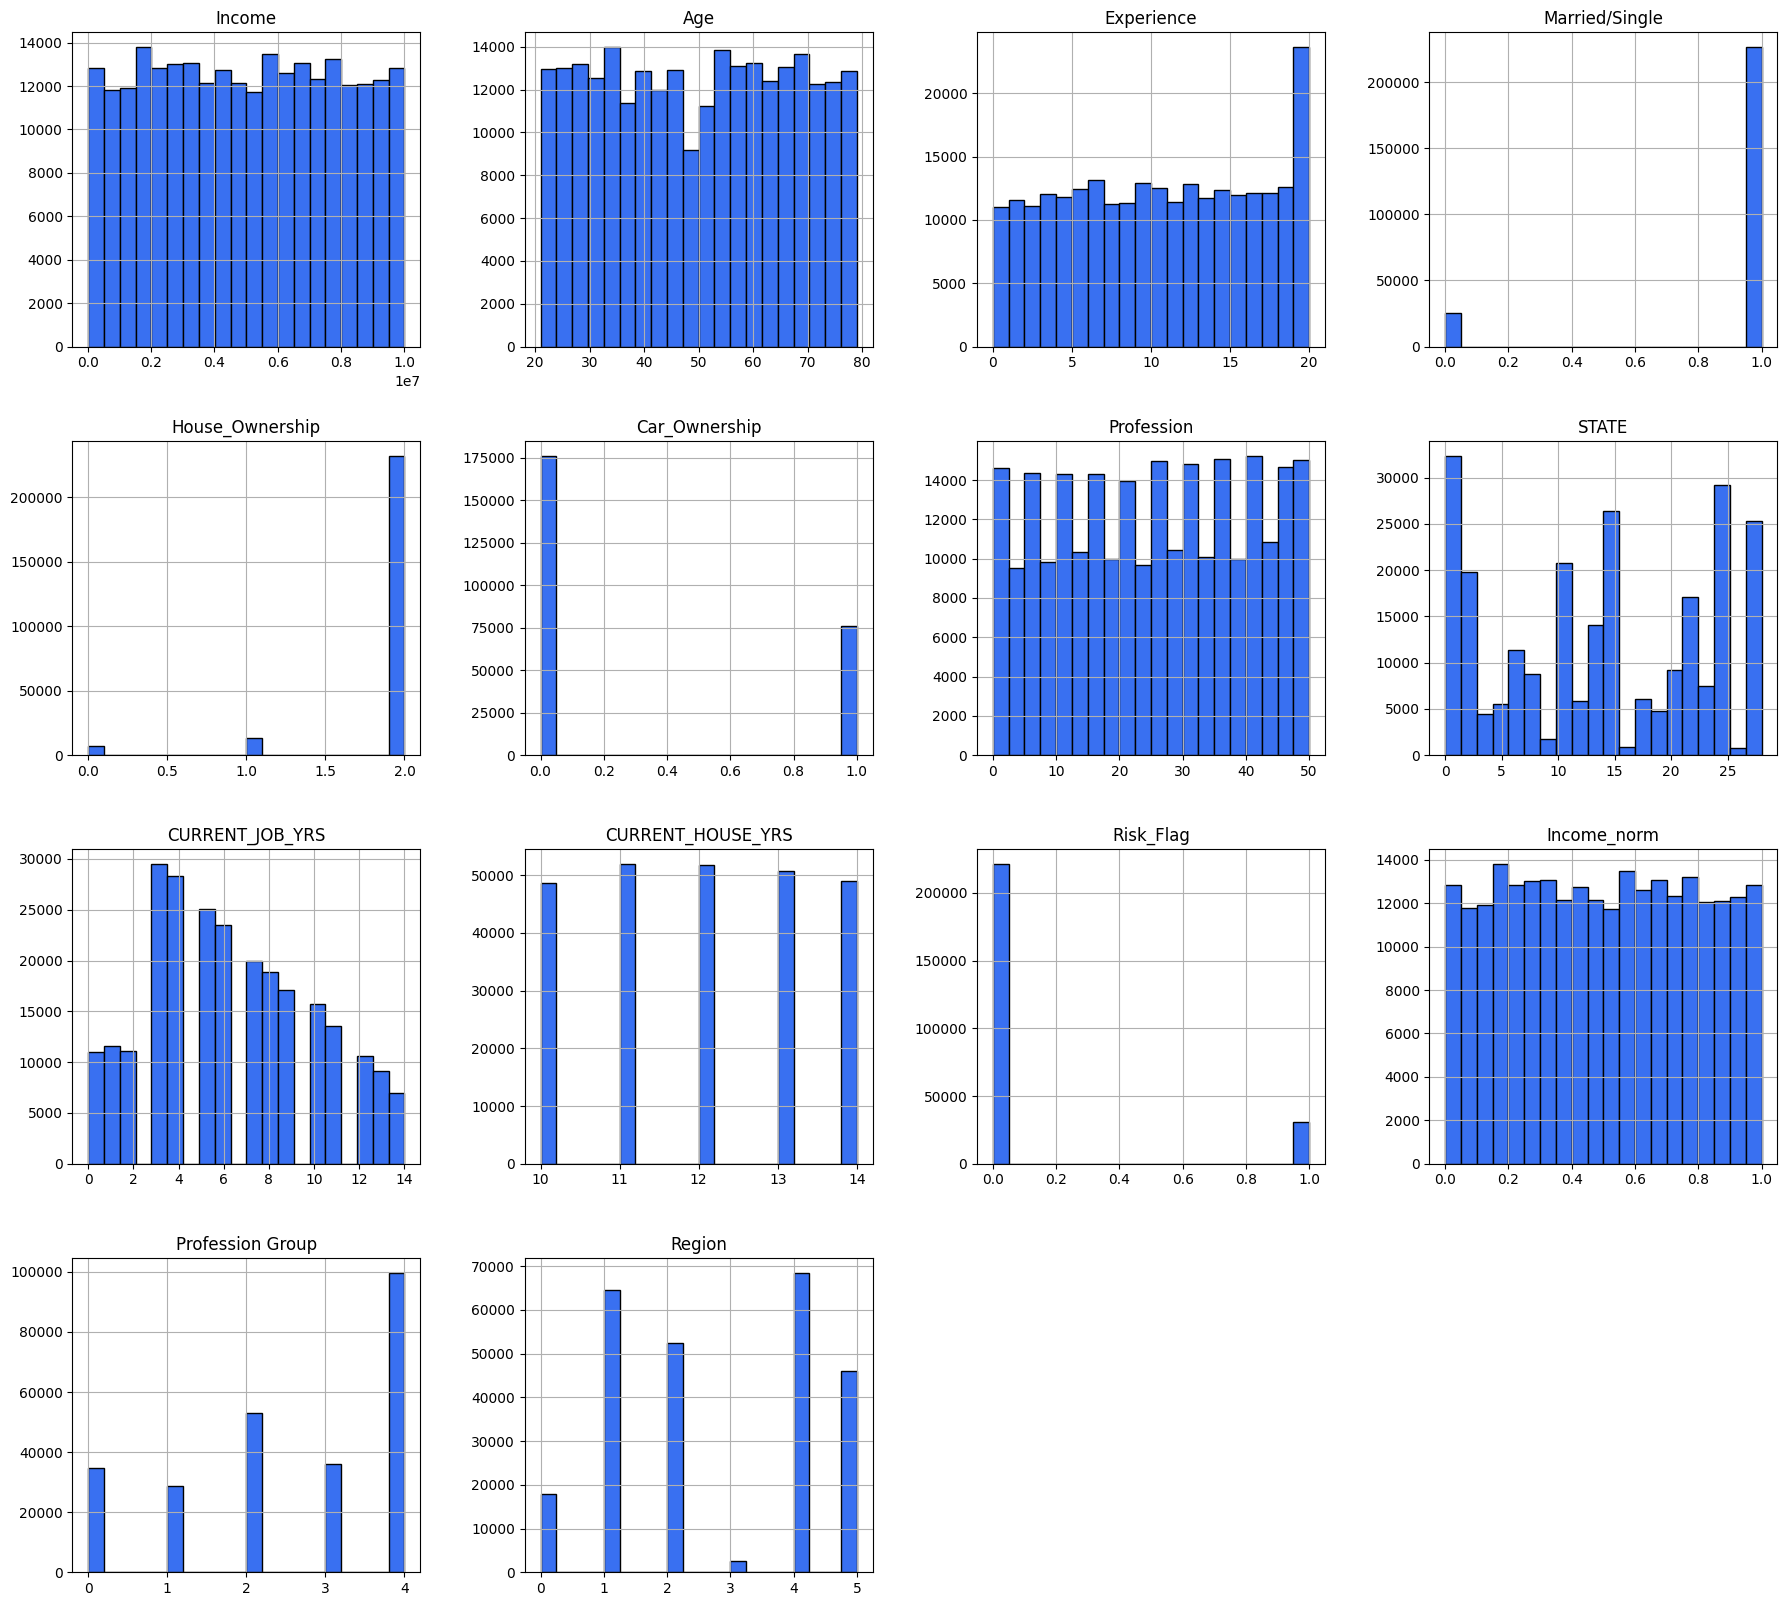

In [30]:
# Make Sure
data_new.hist(color='#3970F1',
                  edgecolor='black',
                  bins=20,
                  figsize = (22, 20))
plt.show()

#### F. Handle class imbalance

In [31]:
# pembuatan binary label target
data_new['Risk_class'] = data_new['Risk_Flag'] > 0.8
data_new['Risk_class'].value_counts()

False    221004
True      30996
Name: Risk_class, dtype: int64

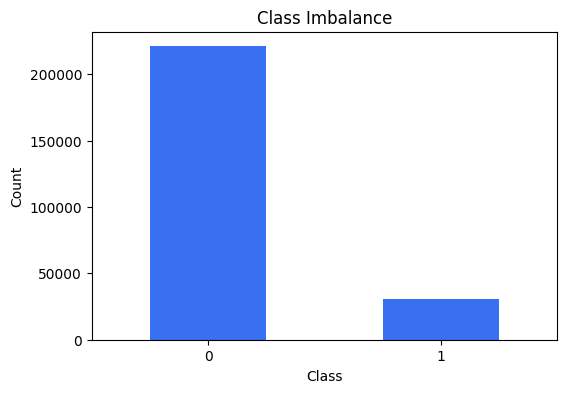

0    221004
1     30996
Name: Risk_Flag, dtype: int64


In [32]:
# Menghitung jumlah sampel dalam setiap kelas
class_counts = data_new['Risk_Flag'].value_counts()

# Membuat diagram batang untuk menampilkan class imbalance
plt.figure(figsize=(6, 4))
class_counts.plot(kind='bar', color='#3970F1')
plt.title('Class Imbalance')
plt.xlabel('Class')
plt.ylabel('Count')
plt.xticks(rotation='horizontal')
plt.show()

# Menampilkan jumlah sampel dalam setiap kelas
print(class_counts)

In [33]:
# pemisahan features vs target
X = data_new[[col for col in data_new.columns if (str(data_new[col].dtype) != 'object') and col not in ['Risk_Flag', 'Risk_class']]]
y = data_new['Risk_class'].values
print(X.shape)
print(y.shape)

(252000, 13)
(252000,)


In [34]:
# Inisialisasi RandomUnderSampler dengan sampling strategy 0.5
rus = RandomUnderSampler(sampling_strategy=0.5)
X_under, y_under = rus.fit_resample(X, y)

# Inisialisasi RandomOverSampler dengan sampling strategy 0.5
ros = RandomOverSampler(sampling_strategy=0.5)
X_over, y_over = ros.fit_resample(X, y)

# Inisialisasi SMOTE dengan sampling strategy 0.5
smote = SMOTE(sampling_strategy=0.5)
X_over_SMOTE, y_over_SMOTE = smote.fit_resample(X, y)

In [35]:
print('Original')
print(pd.Series(y).value_counts())
print('\n')
print('UNDERSAMPLING')
print(pd.Series(y_under).value_counts())
print('\n')
print('OVERSAMPLING')
print(pd.Series(y_over).value_counts())
print('\n')
print('SMOTE')
print(pd.Series(y_over_SMOTE).value_counts())

Original
False    221004
True      30996
dtype: int64


UNDERSAMPLING
False    61992
True     30996
dtype: int64


OVERSAMPLING
False    221004
True     110502
dtype: int64


SMOTE
False    221004
True     110502
dtype: int64


In [36]:
# Pisahkan dengan kolom Target
X = data_new[[col for col in data_new.columns if col not in ['Risk_Flag']]]
y = data_new['Risk_Flag'].values
print(X.shape)
print(y.shape)

(252000, 14)
(252000,)


In [37]:
# Inisialisasi RandomUnderSampler dengan sampling strategy 0.5
rus = RandomUnderSampler(sampling_strategy=0.5)
X_under, y_under = rus.fit_resample(X, y)

# Inisialisasi RandomOverSampler dengan sampling strategy 0.5
ros = RandomOverSampler(sampling_strategy=0.5)
X_over, y_over = ros.fit_resample(X, y)

# Inisialisasi SMOTE dengan sampling strategy 0.5
smote = SMOTE(sampling_strategy=0.5)
X_over_SMOTE, y_over_SMOTE = smote.fit_resample(X, y)

In [38]:
print('Original')
print(pd.Series(y).value_counts())
print('\n')
print('UNDERSAMPLING')
print(pd.Series(y_under).value_counts())
print('\n')
print('OVERSAMPLING')
print(pd.Series(y_over).value_counts())
print('\n')
print('SMOTE')
print(pd.Series(y_over_SMOTE).value_counts())

Original
0    221004
1     30996
dtype: int64


UNDERSAMPLING
0    61992
1    30996
dtype: int64


OVERSAMPLING
0    221004
1    110502
dtype: int64


SMOTE
0    221004
1    110502
dtype: int64


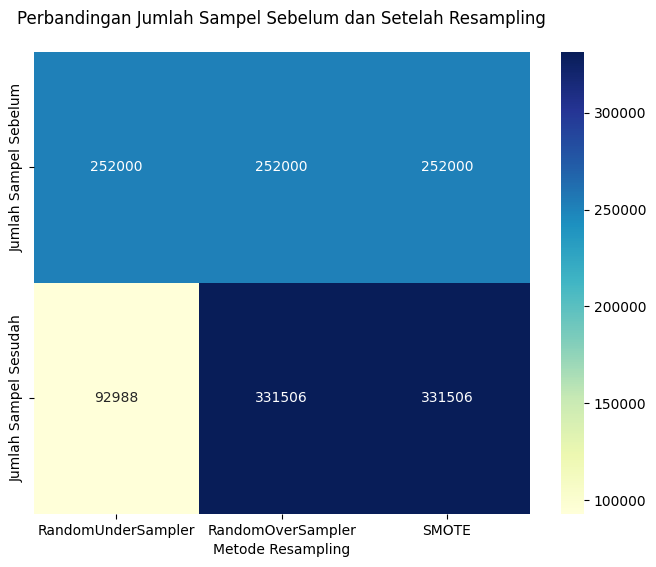

In [39]:
# Data jumlah sampel sebelum dan setelah resampling
data_resampling = {
    'Metode Resampling': ['RandomUnderSampler', 'RandomOverSampler', 'SMOTE'],
    'Jumlah Sampel Sebelum': [len(y), len(y), len(y)],
    'Jumlah Sampel Sesudah': [len(y_under), len(y_over), len(y_over_SMOTE)]
}

# Membuat DataFrame dari data resampling
df_resampling = pd.DataFrame(data_resampling)

# Membuat heatmap
plt.figure(figsize=(8, 6))
heatmap = sns.heatmap(df_resampling.set_index('Metode Resampling').T, annot=True, cmap='YlGnBu', fmt='g')
heatmap.set_title('Perbandingan Jumlah Sampel Sebelum dan Setelah Resampling', pad=20)
plt.show()

In [40]:
# Membuat DataFrame baru dengan hasil SMOTE
data_new_balanced = pd.DataFrame(X_over_SMOTE, columns=data_new.drop(columns=['Risk_class']).columns)
data_new_balanced['Risk_class'] = y_over_SMOTE

In [41]:
data_new_balanced['Risk_class'].value_counts()

0    221004
1    110502
Name: Risk_class, dtype: int64

### Feature Engineering

In [42]:
data_new_balanced.head(10)

,Income,Age,Experience,Married/Single,House_Ownership,Car_Ownership,Profession,STATE,CURRENT_JOB_YRS,CURRENT_HOUSE_YRS,Risk_Flag,Income_norm,Profession Group,Region,Risk_class
0,1303834,23,3,1,2,0,33,13,3,13,NaN,0.129487,4,0,0
1,7574516,40,10,1,2,0,43,14,9,13,NaN,0.757206,4,5,0
2,3991815,66,4,0,2,0,47,12,4,10,NaN,0.398564,4,4,0
3,6256451,41,2,1,2,1,43,17,2,12,NaN,0.625263,4,1,1
4,5768871,47,11,1,2,0,11,22,3,14,NaN,0.576454,2,4,1
5,6915937,64,0,1,2,0,11,14,0,12,NaN,0.691280,2,5,0
6,3954973,58,14,0,2,0,31,22,8,12,NaN,0.394876,3,4,0
7,1706172,33,2,1,2,0,20,6,2,14,NaN,0.169762,1,5,0
8,7566849,24,17,1,2,1,25,20,11,11,NaN,0.756438,2,5,0
9,8964846,23,12,1,2,0,2,23,5,13,NaN,0.896383,4,4,0


In [43]:
data_new_balanced.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 331506 entries, 0 to 331505
Data columns (total 15 columns):
 #   Column             Non-Null Count   Dtype  
---  ------             --------------   -----  
 0   Income             331506 non-null  int64  
 1   Age                331506 non-null  int64  
 2   Experience         331506 non-null  int64  
 3   Married/Single     331506 non-null  int64  
 4   House_Ownership    331506 non-null  int64  
 5   Car_Ownership      331506 non-null  int64  
 6   Profession         331506 non-null  int64  
 7   STATE              331506 non-null  int64  
 8   CURRENT_JOB_YRS    331506 non-null  int64  
 9   CURRENT_HOUSE_YRS  331506 non-null  int64  
 10  Risk_Flag          0 non-null       float64
 11  Income_norm        331506 non-null  float64
 12  Profession Group   331506 non-null  int64  
 13  Region             331506 non-null  int64  
 14  Risk_class         331506 non-null  int64  
dtypes: float64(2), int64(13)
memory usage: 37.9 MB


In [44]:
data_new_balanced = data_new_balanced.drop(['CURRENT_JOB_YRS', 'Risk_Flag', 'STATE', 'Profession', 'Income'], axis=1)

In [45]:
data_new_balanced.head(10)

,Age,Experience,Married/Single,House_Ownership,Car_Ownership,CURRENT_HOUSE_YRS,Income_norm,Profession Group,Region,Risk_class
0,23,3,1,2,0,13,0.129487,4,0,0
1,40,10,1,2,0,13,0.757206,4,5,0
2,66,4,0,2,0,10,0.398564,4,4,0
3,41,2,1,2,1,12,0.625263,4,1,1
4,47,11,1,2,0,14,0.576454,2,4,1
5,64,0,1,2,0,12,0.691280,2,5,0
6,58,14,0,2,0,12,0.394876,3,4,0
7,33,2,1,2,0,14,0.169762,1,5,0
8,24,17,1,2,1,11,0.756438,2,5,0
9,23,12,1,2,0,13,0.896383,4,4,0


#### Feature Selection

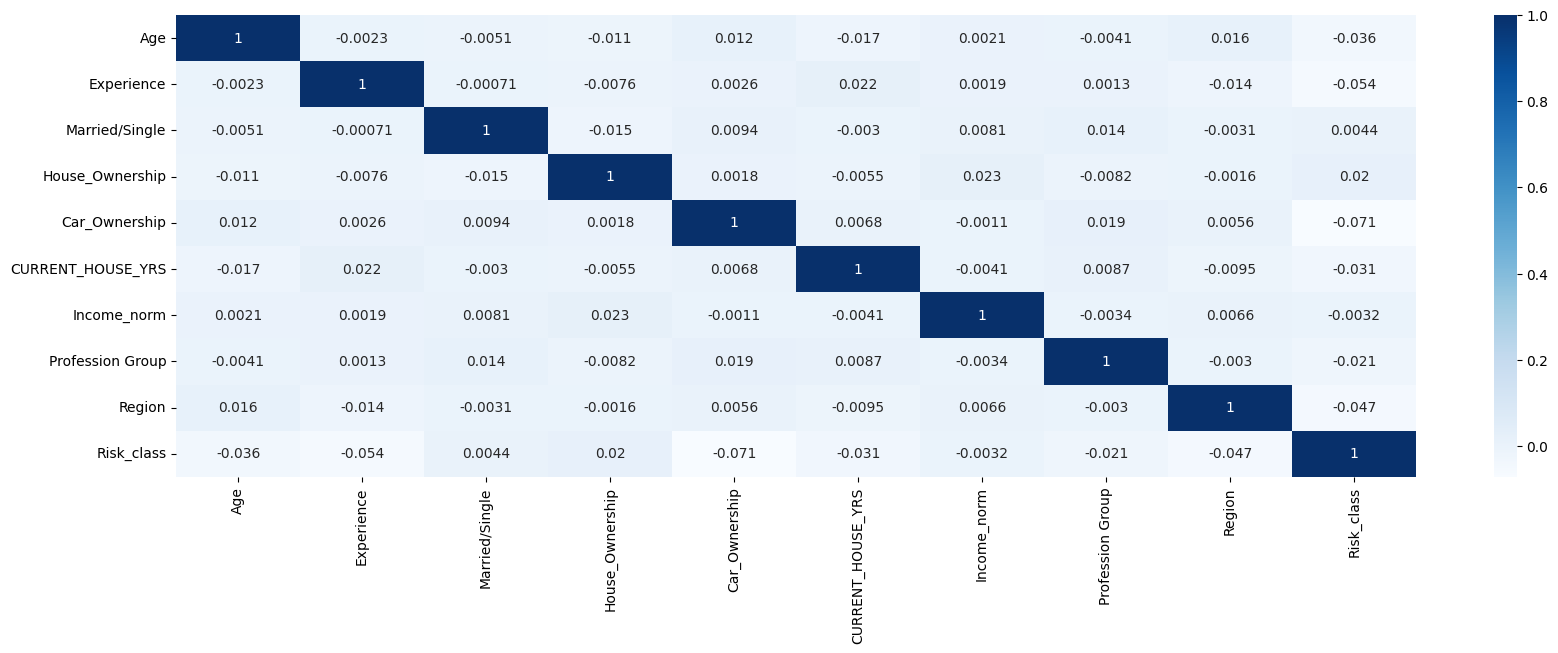

In [46]:
# Melihat Korelasi antara feature dan target
plt.figure(figsize=(20, 6))
sns.heatmap(data_new_balanced.corr(),
            cmap='Blues',
            annot=True,
           )

plt.show()

In [47]:
data_new_balanced.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 331506 entries, 0 to 331505
Data columns (total 10 columns):
 #   Column             Non-Null Count   Dtype  
---  ------             --------------   -----  
 0   Age                331506 non-null  int64  
 1   Experience         331506 non-null  int64  
 2   Married/Single     331506 non-null  int64  
 3   House_Ownership    331506 non-null  int64  
 4   Car_Ownership      331506 non-null  int64  
 5   CURRENT_HOUSE_YRS  331506 non-null  int64  
 6   Income_norm        331506 non-null  float64
 7   Profession Group   331506 non-null  int64  
 8   Region             331506 non-null  int64  
 9   Risk_class         331506 non-null  int64  
dtypes: float64(1), int64(9)
memory usage: 25.3 MB


In [48]:
feature = data_new_balanced[['Married/Single', 'House_Ownership', 'Car_Ownership',
                            'CURRENT_HOUSE_YRS', 'Profession Group', 'Region']]

target = data_new_balanced['Risk_class']

Setelah proses data cleansing selesai, langkah selanjutnya adalah melakukan feature selection untuk menentukan fitur dan target yang akan digunakan. Dalam konteks ini, fitur dan target yang akan digunakan adalah:

Feature :
- Married/Single
- House_Ownership
- Car_Ownership
- CURRENT_HOUSE_YRS
- Profession Group
- Region

Target : Risk Flag


In [49]:
feature_train, feature_test, target_train, target_test = train_test_split(feature, target, test_size=0.2, random_state=42)

print(feature_train.shape)
print(feature_test.shape)
print(target_train.shape)
print(target_test.shape)

(265204, 6)
(66302, 6)
(265204,)
(66302,)


Melakukan pembagian dataset menjadi data training dan data testing dengan menggunakan library train_test_split.

- Feature_train : menunjukkan bahwa terdapat 265,204 baris dan 6 kolom dalam data latihan.
- Feature_test : menunjukkan bahwa terdapat 66,302 baris dan 6 kolom dalam data pengujian.
- Target_train : menunjukkan bahwa terdapat 265,204 data target dalam data latihan.
- Target_test : menunjukkan bahwa terdapat 66,302 data target dalam data pengujian.

##### Menggunakan Chi Squere Test

In [50]:
def chi_square_test(data, feature, target):
    contingency = pd.crosstab(data_new_balanced[feature], data_new_balanced[target])
    chi2, p_value, dof, expected = chi2_contingency(contingency)
    print("Correlation between " + feature + " and " + target)
    print(f"Chi-squared value: {chi2:.2f}")
    print(f"p-value: {p_value:.2f}")

    if p_value < 0.05:
        print("The condition is not independent")
    else:
        print("The condition is independent")

In [51]:
for col in feature:
    chi_square_test(data_new_balanced, col, 'Risk_class')
    print(" ")
    print('---'*10, '\n')

Correlation between Married/Single and Risk_class
Chi-squared value: 6.34
p-value: 0.01
The condition is not independent
 
------------------------------ 

Correlation between House_Ownership and Risk_class
Chi-squared value: 128.30
p-value: 0.00
The condition is not independent
 
------------------------------ 

Correlation between Car_Ownership and Risk_class
Chi-squared value: 1685.74
p-value: 0.00
The condition is not independent
 
------------------------------ 

Correlation between CURRENT_HOUSE_YRS and Risk_class
Chi-squared value: 545.29
p-value: 0.00
The condition is not independent
 
------------------------------ 

Correlation between Profession Group and Risk_class
Chi-squared value: 1209.56
p-value: 0.00
The condition is not independent
 
------------------------------ 

Correlation between Region and Risk_class
Chi-squared value: 4579.03
p-value: 0.00
The condition is not independent
 
------------------------------ 



Metode ini digunakan untuk menguji hubungan signifikan antara dua variabel kategorik dari feature dan target dengan menggunakan uji Chi-Square. Jika p-value lebih kecil dari 0.05, maka ada hubungan antara feature dan target.

In [52]:
kbest = SelectKBest(score_func=chi2, k='all')  # 'all' untuk mendapatkan semua fitur
X_chi2 = kbest.fit_transform(X, y)

p_values = kbest.pvalues_
selected_features = [feature for feature, p_value in zip(X.columns, p_values) if p_value < 0.05]  # Misalnya, ambil fitur dengan p-value < 0.05

print("Selected Features:", selected_features)

Selected Features: ['Income', 'Age', 'Experience', 'Married/Single', 'House_Ownership', 'Car_Ownership', 'Profession', 'STATE', 'CURRENT_JOB_YRS', 'Region', 'Risk_class']


Metode ini salah satu dari penggunaan chi-square dengan menggunakan SelectKBest dari library Scikit-Learn untuk mempertahankan feature yang memiliki hubungan yang signifikan dengan variabel target

##### Menggunakan Mutual Information Score

In [53]:
mi_scores = mutual_info_classif(feature, target)

# Menampilkan skor untuk setiap fitur
for i, score in enumerate(mi_scores):
    print(f"Feature {feature.columns[i]}: {score:.2f}")

Feature Married/Single: 0.04
Feature House_Ownership: 0.04
Feature Car_Ownership: 0.01
Feature CURRENT_HOUSE_YRS: 0.01
Feature Profession Group: 0.02
Feature Region: 0.01


Dengan menggunakan metode ini, Dapat mengidentifikasi feature yang memiliki ketergantungan yang signifikan dengan target. Skor Mutual Information yang tinggi menunjukkan bahwa variabel tersebut lebih berkorelasi dengan variabel target.

##### Menggunakan Variance Threshold

In [54]:
selector = VarianceThreshold(threshold=0.01)
selector.fit(feature)
selected_features_variance = feature.columns[selector.get_support()]

In [55]:
selector

VarianceThreshold(threshold=0.01)

In [56]:
selected_features_variance

Index(['Married/Single', 'House_Ownership', 'Car_Ownership',
       'CURRENT_HOUSE_YRS', 'Profession Group', 'Region'],
      dtype='object')

Menggunakan metode VarianceThreshold untuk melakukan seleksi berdasarkan varians. Dalam metode ini, kita menentukan nilai minimum varians yang akan digunakan sebagai batas untuk memilih fitur. Sebagai contoh, kita dapat mengatur threshold sebesar 0,01, yang akan mengakibatkan penghapusan fitur-fitur dengan varians kurang dari 0,01.

#### Feature Extraction

##### Menggunakan Importance

In [57]:
clf = RandomForestClassifier(n_estimators=100, random_state=42)
clf.fit(feature, target)

RandomForestClassifier(random_state=42)

In [58]:
importances = clf.feature_importances_
for feature, importances in zip(feature, importances):
    print(feature, importances)

Married/Single 0.053491925585670286
House_Ownership 0.08458912611814658
Car_Ownership 0.07291332881012634
CURRENT_HOUSE_YRS 0.2408293140718564
Profession Group 0.22288640512692695
Region 0.3252899002872735


Metode ini digunakan untuk melatih model Random Forest Classifier dan menghitung feature importance dengan 100 estimator dan random state 42. Feature importance digunakan untuk mengukuran seberapa penting suatu fitur dalam mempengaruhi target. Feature dengan importance yang lebih tinggi lebih penting dari pada feature dengan importance yang lebih rendah.

##### Menggunakan PCA

In [59]:
pca = PCA(n_components=2)

pca.fit(data_new_balanced)

# Transform data menggunakan PCA
pca_features = pca.transform(data_new_balanced)

print(pca_features)

[[-26.66369751  -6.93924833]
 [ -9.66209413   0.05542298]
 [ 16.34580759  -5.93240033]
 ...
 [ 16.33352952  -1.90846841]
 [-25.65875029  -4.96002623]
 [ -9.65937051  -6.93957433]]


Metode ini digunakan untuk melakukan reduksi dimensi data menggunakan teknik Principal Component Analysis (PCA). PCA adalah teknik yang digunakan untuk mengurangi jumlah fitur data dengan mempertahankan informasi sebanyak mungkin.

In [60]:
# Evaluasi hasil PCA
explained_variance = pca.explained_variance_ratio_
print(explained_variance)

[0.87015323 0.10727858]


Code ini digunakan untuk menampilkan rasio varians yang diambil dari hasil analisis PCA. Dalam hasil evaluasi PCA. PC1 menjelaskan sekitar 0.870 dari total variasi dalam data, sedangkan PC2 hanya menjelaskan sekitar 0.107 dari total variasi. Sehingga dapat dilihat bahwa sebagian besar variasi dalam data dapat dijelaskan oleh PC1, sementara PC2 memberikan kontribusi yang lebih kecil terhadap variasi data.

Note:
Kelebihan menggunakan PCA
- PCA dapat mengurangi dimensi data : Ini sangat berguna ketika kita memiliki dataset dengan banyak fitur atau variabel, dan ingin menyederhanakannya tanpa kehilangan informasi penting.
- Menghilangkan Korelasi: PCA merubah data asli menjadi fitur yang saling independen atau berkorelasi rendah, yang membantu mengatasi masalah dalam analisis regresi.

Kekurangan menggunakan PCA
- Informasi yang Hilang: Dalam proses reduksi dimensi, beberapa informasi mungkin hilang, terutama jika komponen-komponen dengan nilai yang lebih rendah dihapus.
- Interpretasi yang Sulit: Hasil PCA sulit diinterpretasikan dalam konteks nyata, karena komponen utama tidak selalu memiliki makna yang jelas.

### Convert ke file CSV

In [61]:
# # Convert ke file CSV

# data_new_balanced.to_csv("data_new_new.csv",indefeature=False)